In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import cluster
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler

In [2]:
pd.options.display.max_rows =100

## COPIED FROM MAIN ASSIGNMENT DOCUMENT....DO NOT PASTE BACK IN

In [3]:
## READ IN DATASET TO PANDAS DATAFRAME
column_names = ("Elevation","Aspect","Slope","Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology","Horizontal_Distance_To_Roadways","Hillshade_9am","Hillshade_Noon","Hillshade_3pm","Horizontal_Distance_To_Fire_Points","Wilderness_Area_01","Wilderness_Area_02","Wilderness_Area_03","Wilderness_Area_04","Soil_Type_01","Soil_Type_02","Soil_Type_03","Soil_Type_04","Soil_Type_05","Soil_Type_06","Soil_Type_07","Soil_Type_08","Soil_Type_09","Soil_Type_10","Soil_Type_11","Soil_Type_12","Soil_Type_13","Soil_Type_14","Soil_Type_15","Soil_Type_16","Soil_Type_17","Soil_Type_18","Soil_Type_19","Soil_Type_20","Soil_Type_21","Soil_Type_22","Soil_Type_23","Soil_Type_24","Soil_Type_25","Soil_Type_26","Soil_Type_27","Soil_Type_28","Soil_Type_29","Soil_Type_30","Soil_Type_31","Soil_Type_32","Soil_Type_33","Soil_Type_34","Soil_Type_35","Soil_Type_36","Soil_Type_37","Soil_Type_38","Soil_Type_39","Soil_Type_40","Cover_Type")
soil = pd.read_table("covtype.data", sep=",", names=column_names)

In [4]:
## CHECK SHAPE OF DATA
soil.shape

(581012, 55)

In [5]:
soil.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [6]:
print (soil.dtypes)
## ALL IMPORTED DATATYPES ARE NUMERICAL. THEREFORE NO WHITESPACES/BROKEN STRINGS.

Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area_01                    int64
Wilderness_Area_02                    int64
Wilderness_Area_03                    int64
Wilderness_Area_04                    int64
Soil_Type_01                          int64
Soil_Type_02                          int64
Soil_Type_03                          int64
Soil_Type_04                          int64
Soil_Type_05                          int64
Soil_Type_06                          int64
Soil_Type_07                          int64
Soil_Type_08                          int64
Soil_Type_09                    

In [7]:
## CONVERT WILDERNESS TYPE, SOIL TYPE AND COVER TYPE TO CATEGORICAL DATA
for pos in range(10,55):
    soil[soil.columns[pos]] = soil[soil.columns[pos]].astype('category')
soil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
Elevation                             581012 non-null int64
Aspect                                581012 non-null int64
Slope                                 581012 non-null int64
Horizontal_Distance_To_Hydrology      581012 non-null int64
Vertical_Distance_To_Hydrology        581012 non-null int64
Horizontal_Distance_To_Roadways       581012 non-null int64
Hillshade_9am                         581012 non-null int64
Hillshade_Noon                        581012 non-null int64
Hillshade_3pm                         581012 non-null int64
Horizontal_Distance_To_Fire_Points    581012 non-null int64
Wilderness_Area_01                    581012 non-null category
Wilderness_Area_02                    581012 non-null category
Wilderness_Area_03                    581012 non-null category
Wilderness_Area_04                    581012 non-null category
Soil_Type_01                         

In [8]:
## CHECK IF THERE ARE ANY MISSING VALUES
print ('MISSING VALUES : ' + str(soil.isnull().values.any()))

MISSING VALUES : False


In [9]:
## SANITY CHECKS FOR NUMERICAL COLUMNS

In [10]:
for col in soil.columns:
    if (soil[col].dtype.name == 'int64'):
        print 'Maximum value for',soil[col].name,'=',soil[col].max(axis=0), '\n'
        print 'Minimum value for',soil[col].name,'=',soil[col].min(axis=0), '\n'

Maximum value for Elevation = 3858 

Minimum value for Elevation = 1859 

Maximum value for Aspect = 360 

Minimum value for Aspect = 0 

Maximum value for Slope = 66 

Minimum value for Slope = 0 

Maximum value for Horizontal_Distance_To_Hydrology = 1397 

Minimum value for Horizontal_Distance_To_Hydrology = 0 

Maximum value for Vertical_Distance_To_Hydrology = 601 

Minimum value for Vertical_Distance_To_Hydrology = -173 

Maximum value for Horizontal_Distance_To_Roadways = 7117 

Minimum value for Horizontal_Distance_To_Roadways = 0 

Maximum value for Hillshade_9am = 254 

Minimum value for Hillshade_9am = 0 

Maximum value for Hillshade_Noon = 254 

Minimum value for Hillshade_Noon = 0 

Maximum value for Hillshade_3pm = 254 

Minimum value for Hillshade_3pm = 0 

Maximum value for Horizontal_Distance_To_Fire_Points = 7173 

Minimum value for Horizontal_Distance_To_Fire_Points = 0 



In [11]:
## SANITY CHECKS FOR CATEGORICAL COLUMNS

In [12]:
for col in soil.columns:
    if (soil[col].dtype.name == 'category'):
        print (soil[col].value_counts(), '\n')

(0    320216
1    260796
Name: Wilderness_Area_01, dtype: int64, '\n')
(0    551128
1     29884
Name: Wilderness_Area_02, dtype: int64, '\n')
(0    327648
1    253364
Name: Wilderness_Area_03, dtype: int64, '\n')
(0    544044
1     36968
Name: Wilderness_Area_04, dtype: int64, '\n')
(0    577981
1      3031
Name: Soil_Type_01, dtype: int64, '\n')
(0    573487
1      7525
Name: Soil_Type_02, dtype: int64, '\n')
(0    576189
1      4823
Name: Soil_Type_03, dtype: int64, '\n')
(0    568616
1     12396
Name: Soil_Type_04, dtype: int64, '\n')
(0    579415
1      1597
Name: Soil_Type_05, dtype: int64, '\n')
(0    574437
1      6575
Name: Soil_Type_06, dtype: int64, '\n')
(0    580907
1       105
Name: Soil_Type_07, dtype: int64, '\n')
(0    580833
1       179
Name: Soil_Type_08, dtype: int64, '\n')
(0    579865
1      1147
Name: Soil_Type_09, dtype: int64, '\n')
(0    548378
1     32634
Name: Soil_Type_10, dtype: int64, '\n')
(0    568602
1     12410
Name: Soil_Type_11, dtype: int64, '\n')
(

In [13]:
## I WANT TO PERFORM A SANITY CHECK FOR WILDERNESS AREAS....CAN A POINT HAVE MORE THAN 1 WILDERNESS AREA TYPES?
## IF NOT CAN WE ADD A NEW COLUMN (LIKE THE COVERTYPE COLUMN) WHERE THE COLUMN JUST RECORDS WHICH WILDERNESS AREA

for pos in range(10,14):
    soil[soil.columns[pos]] = soil[soil.columns[pos]].astype('int64')

soil['Wilderness_Type'] = soil['Wilderness_Area_01'] + soil['Wilderness_Area_02'] + soil['Wilderness_Area_03'] + soil['Wilderness_Area_04']

dup_rec = False
for i in range(soil['Wilderness_Type'].count()):
    if soil.at[i, 'Wilderness_Type'] != 1:
        dup_rec = True
        print ('Multiple Wilderness Areas detected in same row. Invalid record.')
        break

if dup_rec == False:
    print('No duplicate records found')    

No duplicate records found


In [14]:
for i in range(soil['Wilderness_Type'].count()):
    if soil.at[i, 'Wilderness_Area_01'] == 1:
        soil.at[i, 'Wilderness_Type'] = 1
    elif soil.at[i, 'Wilderness_Area_02'] == 1:
        soil.at[i, 'Wilderness_Type'] = 2
    elif soil.at[i, 'Wilderness_Area_03'] == 1:
        soil.at[i, 'Wilderness_Type'] = 3
    else: 
        soil.at[i, 'Wilderness_Type'] = 4


In [15]:
soil['Wilderness_Type'] = soil['Wilderness_Type'].astype('category')
soil['Wilderness_Type'].value_counts()

1    260796
3    253364
4     36968
2     29884
Name: Wilderness_Type, dtype: int64

In [16]:
soil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 56 columns):
Elevation                             581012 non-null int64
Aspect                                581012 non-null int64
Slope                                 581012 non-null int64
Horizontal_Distance_To_Hydrology      581012 non-null int64
Vertical_Distance_To_Hydrology        581012 non-null int64
Horizontal_Distance_To_Roadways       581012 non-null int64
Hillshade_9am                         581012 non-null int64
Hillshade_Noon                        581012 non-null int64
Hillshade_3pm                         581012 non-null int64
Horizontal_Distance_To_Fire_Points    581012 non-null int64
Wilderness_Area_01                    581012 non-null int64
Wilderness_Area_02                    581012 non-null int64
Wilderness_Area_03                    581012 non-null int64
Wilderness_Area_04                    581012 non-null int64
Soil_Type_01                          581012 non-

In [17]:
for pos in range(14,54):
    soil[soil.columns[pos]] = soil[soil.columns[pos]].astype('int64')

soil['Soil_Type'] = 7
    

In [18]:
for pos in range(14,54):
    print (soil[soil.columns[pos]].value_counts())

0    577981
1      3031
Name: Soil_Type_01, dtype: int64
0    573487
1      7525
Name: Soil_Type_02, dtype: int64
0    576189
1      4823
Name: Soil_Type_03, dtype: int64
0    568616
1     12396
Name: Soil_Type_04, dtype: int64
0    579415
1      1597
Name: Soil_Type_05, dtype: int64
0    574437
1      6575
Name: Soil_Type_06, dtype: int64
0    580907
1       105
Name: Soil_Type_07, dtype: int64
0    580833
1       179
Name: Soil_Type_08, dtype: int64
0    579865
1      1147
Name: Soil_Type_09, dtype: int64
0    548378
1     32634
Name: Soil_Type_10, dtype: int64
0    568602
1     12410
Name: Soil_Type_11, dtype: int64
0    551041
1     29971
Name: Soil_Type_12, dtype: int64
0    563581
1     17431
Name: Soil_Type_13, dtype: int64
0    580413
1       599
Name: Soil_Type_14, dtype: int64
0    581009
1         3
Name: Soil_Type_15, dtype: int64
0    578167
1      2845
Name: Soil_Type_16, dtype: int64
0    577590
1      3422
Name: Soil_Type_17, dtype: int64
0    579113
1      1899
Name: S

In [19]:
dup_rec = False
for i in range(soil['Soil_Type'].count()):
    if soil.at[i, 'Soil_Type'] != 7:
        dup_rec = True
        print ('Multiple Soil Types detected in same row. Invalid record.')
        break

if dup_rec == False:
    print('No duplicate records found')    

No duplicate records found


In [20]:
soil['Soil_Type'] = 7

type_5 = [20,21]
type_2 = [22,35,36]
type_1 = [27,28,29,30,32,33,34,35,36]

for i in range(soil['Soil_Type'].count()):
    for j in type_5:
        if soil.iat[i, j] == 1:
            soil.iat[i, 56] = 5
    for j in type_2:
        if soil.iat[i, j] == 1:
            soil.iat[i, 56] = 2  
    for j in type_1:
        if soil.iat[i, j] == 1:
            soil.iat[i, 56] = 1

In [21]:
soil['Soil_Type'].value_counts()

7    467469
1    112112
2      1147
5       284
Name: Soil_Type, dtype: int64

### ABOVE COPIED FROM MAIN ASSIGNMENT DOCUMENT...DO NOT COPY BACK

## START FROM HERE WHEN TESTING SPECIFIC RELATIONSHIPS ## 

In [22]:
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import datetime

In [23]:
dataset_subset = soil[["Elevation","Aspect","Slope","Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology","Horizontal_Distance_To_Roadways","Hillshade_9am","Hillshade_Noon","Hillshade_3pm","Horizontal_Distance_To_Fire_Points","Cover_Type","Wilderness_Type","Soil_Type"]]

In [47]:
model_prep = dataset_subset.copy(deep=True) 
model_prep.drop(model_prep.index[10000:], inplace=True)

In [218]:


################################
## SUBSETTING SOIL FOR MODELLING
################################



##########################
## EXPORT TO JPEG FUNCTION
##########################
def export_to_jpeg(epsilon,minPts):
    now = datetime.datetime.now()
    filename = "eps_"+str(epsilon)+"_minPts_"+str(minPts)+"_plots_at_"+str(now.hour)+"_"+str(now.minute)+"_"+str(now.day)+".jpeg"
    plt.savefig(filename)
    
def export_to_jpeg_boxplot(epsilon,minPts):
    now = datetime.datetime.now()
    filename = "boxplot_"+str(model.columns[0])+"_groupedByClusters_"+str(now.hour)+"_"+str(now.minute)+"_"+str(now.day)+".jpeg"
    plt.savefig(filename)
    

########################
##VISUALISATION FUNCTION
########################
def plot_clusters_graph(variable_1,variable_2):
    title = "DBSCAN scatter plot for "+str(model.columns[0])+" vs "+str(model.columns[1])+" using an eps = "+ str(epsilon)+" and a min_sample of "+ str(minPts)
    plt.figure(figsize=(15, 15))
    plt.scatter(model.iloc[:,0],model.iloc[:,1], c=labels, alpha = 0.8, s= 250.0, lw= 0)
    plt.title(title)
    export_to_jpeg(epsilon,minPts)  ## Saving an export of the graph
    plt.show() 
    #DO SOMETHING ABOUT OUTLIERS...CHANGE COLOURS SO I HAVE MORE CONTROL 

    
#####################
##VALIDATION FUNCTION
#####################
def validate_test():

    # clustering result
    clustering_result = model[["clusters", "target", "c"]].groupby(["clusters", "target"]).agg("count") 
    print "This is the clustering result\n"
    print(clustering_result)
    
    # confusion matrix
    confusion_matrix = (clustering_result.reset_index().pivot_table(index='clusters', columns='target', values='c', aggfunc='sum', fill_value=0))
    print "This is the confusion matrix\n"
    print(confusion_matrix)

    # other validation techniques/ graph comparison of each column by cluster 
    model_prep['clusters'] = labels
    for col in dataset_subset.columns: 
        title = 'Box plot of '+col+' by clusters'
        plt.figure(col)
        model_prep.boxplot(column=col,by='clusters')
        plt.title(title)
        plt.suptitle("")
        plt.ylabel(col) 


In [ ]:
## TESTING RELATIONSHIP ONLY

In [210]:
##############################################################################
# INITIALIZING MODEL PARAMETERS FOR TESTING
# VARIABLES EXPLORED: ELEVATION vs ASPECT
##############################################################################

## CHANGE THESE TWO VALUES WHEN TESTING DIFFERENT RELATIONSHIPS
variable_1 = 0
variable_2 = 1

# ASSIGN THE VARIABLES BEING TESTED TO THE MODEL_DF OBJECT
model_df = model_prep.iloc[:,[variable_1,variable_2]] 

# STANDARDISERS THIS SUBSET THAT WE ARE ABOUT TO MODEL AND RETURNS TO DATAFRAME FORMAT 
# (FOR EASE OF CALLING LATER)
scaled_features = StandardScaler().fit_transform(model_df)
model = pd.DataFrame(scaled_features, index=model_df.index, columns=model_df.columns)

In [100]:
model

,Elevation,Aspect
0,-0.327766,-0.963521
1,-0.342151,-0.918478
2,0.170898,-0.170755
3,0.125347,-0.026615
4,-0.330164,-1.017573
5,-0.368523,-0.233816
6,-0.303792,-1.017573
7,-0.306189,-0.981538
8,-0.277420,-1.017573
9,-0.289407,-0.891451


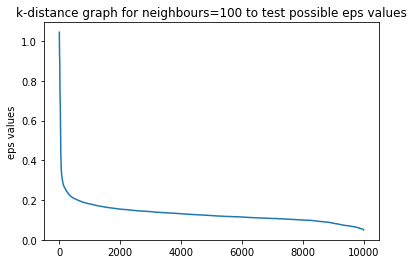

In [101]:
##############################################################################
# FIND THE BEST EPS TO USE FOR THIS RELATIONSHIP
##############################################################################

# SET UP THE NN TEST
nbrs = NearestNeighbors(n_neighbors=50).fit(model)
distances, indices = nbrs.kneighbors(model)
distances.shape

# CHOOSE THE 100th NEIGHBOUR DISTANCE
kDis = distances[:, 49]
kDis.sort()
kDis = kDis[range(len(kDis)-1, 0, -1)]

# PLOT THE K-DISTANCE GRAPH
plt.plot(range(0,len(kDis)), kDis)
plt.title("k-distance graph for neighbours=100 to test possible eps values")
plt.ylabel("eps values")
plt.show()

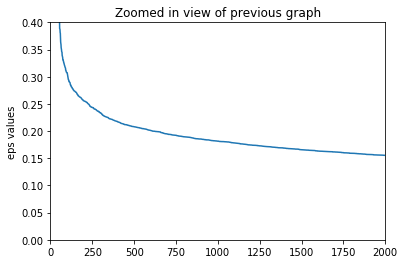

In [93]:
##############################################################################
# ZOOM IN TO SEE CURVE
##############################################################################
plt.plot(range(0,len(kDis)), kDis)
plt.xlim(0,2000)
plt.ylim(0,0.4)
plt.title("Zoomed in view of previous graph")
plt.ylabel("eps values")
plt.show()

In [211]:
##############################################################################
# EXPERIMENT WITH THE EPS BETWEEN ON THE CURVE 
# FOR THIS EXAMPLE: 0.0500 - 0.200 (with MinPts range 25 - 1000)
##############################################################################

########################
## INITIALIZE VARIBALES
########################

## CREATE AN EMPTY PARAMETERS TABLE
# IGNORE FOR NOW: 'metric','metric_params','algorithm','leaf_size_value','p_value','homogeneity_rating','model_score'
param_columnnames = ['variable_1','variable_2','eps_value','min_samples_value','leaf_size','num_of_clusters']
best_parameters = pd.DataFrame(columns=param_columnnames) 


## DBSSCAN ARGUMENT VARIATIONS 
## TESTING eps range from bottom to top of the elbow

min_epsilon = 0.150 ## SET THE BOTTOM RANGE
max_epsilon = 0.400
x = 0.050 # increment for min epsilon to max epsilon
i = 1 ## INITIALIZING i
t = int(round(((max_epsilon-min_epsilon)/x)+1)) ## SET HOW MANY INCREMENTS OF x STEPS YOU WANT TO DO


# testing argument arrays
ms = [1,5,10,25,50,100,200,500,1000,5000] # Minimum sample size values
ls = 'default' # default value set for leaf_size
metric = 'default' # default value set for metric
metric_params = 'default' # default value set for metric_params
algorithm = 'default' # default value set for algorithm
p_value = 'default' # default value set for p-value
model_score = 'null' # default value set for model score

#dataset_subset.rename(columns={'Cover_Type': 'target'}, inplace=True)

for i in range(i, t): # loop for epsilon test
    
    m = 0
    m_range = len(ms)
    epsilon = min_epsilon + (i*x)

    for m in range(m,m_range): # loop for min_samples test

        dbs = cluster.DBSCAN(eps=epsilon,min_samples=ms[m]) # Run the model
        dbs_fit = dbs.fit(model)
        labels = dbs_fit.labels_
        model['clusters'] = labels
        model['c'] = 0
        
        # ADDING A ROW TO THE PARAMETERS TABLE
        best_parameters = best_parameters.append({'variable_1': model.columns[variable_1], 
                                          'variable_2': model.columns[variable_2],
                                          'eps_value':epsilon,
                                          'min_samples_value':ms[m],
                                           'leaf_size':ls,
                                          'num_of_clusters': model["clusters"].max(axis=0) + 2}, ignore_index=True)

        # PUT VALIDATION METHODS IN TO TESTING LOOP

        m = m + 1
    
    i = i + 1


print("A comparision of the best arguments to use for DBSCAN for these variables: ")
print(best_parameters)

KeyboardInterrupt: 

### DUPLICATE CODE BELOW FOR EACH RELATIONSHIP COLUMN

## RELATIONSHIP 1

In [219]:
##############################################################################
# INITIALIZING MODEL PARAMETERS FOR TESTING
# VARIABLES EXPLORED: HORIZONTAL HYRDO to VERTICAL HYRDO
##############################################################################

## CHANGE THESE TWO VALUES WHEN TESTING DIFFERENT RELATIONSHIPS
variable_1 = 3
variable_2 = 4

# ASSIGN THE VARIABLES BEING TESTED TO THE MODEL_DF OBJECT
model_df = model_prep.iloc[:,[variable_1,variable_2]] 

# STANDARDISERS THIS SUBSET THAT WE ARE ABOUT TO MODEL AND RETURNS TO DATAFRAME FORMAT 
# (FOR EASE OF CALLING LATER)
scaled_features = StandardScaler().fit_transform(model_df)
model = pd.DataFrame(scaled_features, index=model_df.index, columns=model_df.columns)

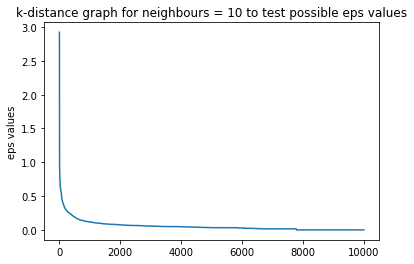

In [213]:
##############################################################################
# FIND THE BEST EPS TO USE FOR THIS RELATIONSHIP
##############################################################################

# SET UP THE NN TEST
nbrs = NearestNeighbors(n_neighbors=10).fit(model)
distances, indices = nbrs.kneighbors(model)
distances.shape

# CHOOSE THE 100th NEIGHBOUR DISTANCE
kDis = distances[:, 9]
kDis.sort()
kDis = kDis[range(len(kDis)-1, 0, -1)]

# PLOT THE K-DISTANCE GRAPH
plt.plot(range(0,len(kDis)), kDis)
plt.title("k-distance graph for neighbours = 10 to test possible eps values")
plt.ylabel("eps values")
plt.show()

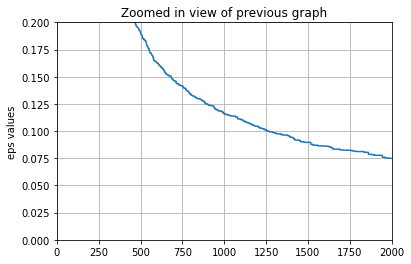

In [141]:
####################################
# ZOOM IN TO SEE CURVE
####################################
plt.plot(range(0,len(kDis)), kDis)
plt.xlim(0,2000)
plt.ylim(0,0.2)
plt.title("Zoomed in view of previous graph")
plt.ylabel("eps values")
plt.grid()
plt.show()

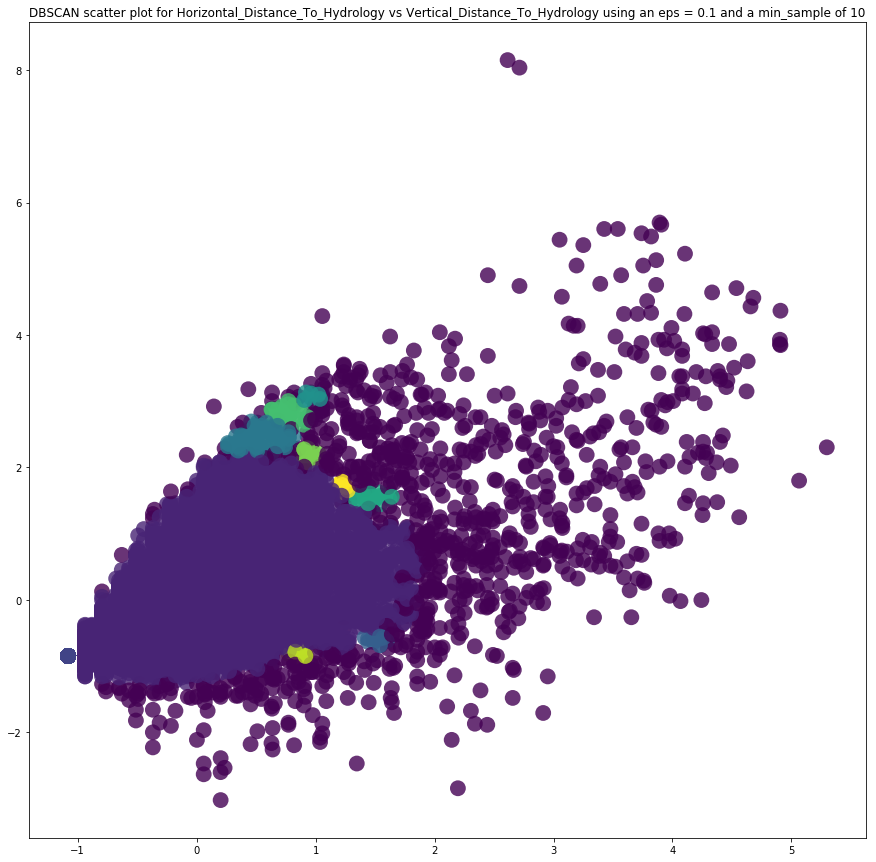

This is the clustering result

                      c
clusters target        
-1       1        190.0
         2        183.0
         3         66.0
         4         30.0
         5        125.0
         6         28.0
         7        298.0
 0       1       1095.0
         2       1217.0
         3       1128.0
         4        895.0
         5       1296.0
         6       1234.0
         7        968.0
 1       1         76.0
         2         40.0
         3         35.0
         4        662.0
         5        122.0
         6         76.0
         7         58.0
 2       1          3.0
         2          5.0
         3          NaN
         4          1.0
         5          NaN
         6          NaN
         7          3.0
 3       1          2.0
         2          1.0
         3         18.0
         4         18.0
         5         22.0
         6          4.0
         7          7.0
 4       1          NaN
         2          1.0
         3          1.0
         

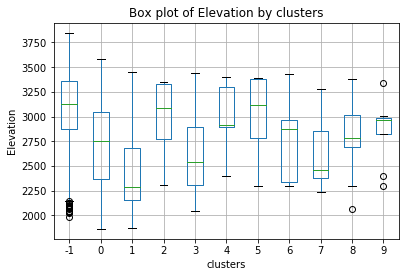

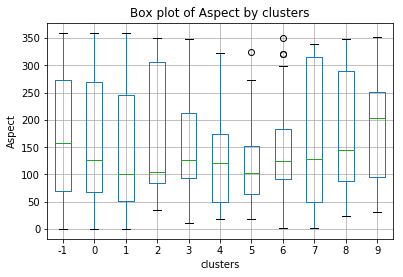

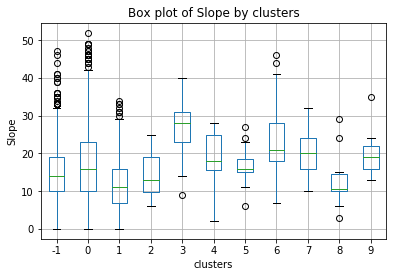

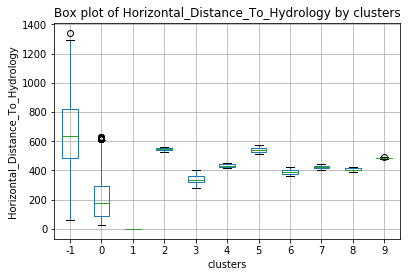

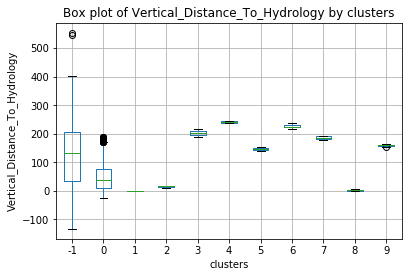

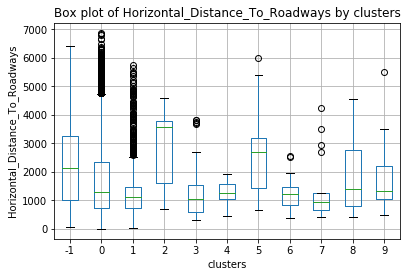

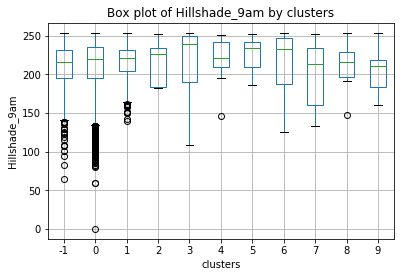

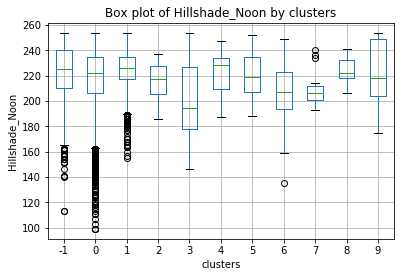

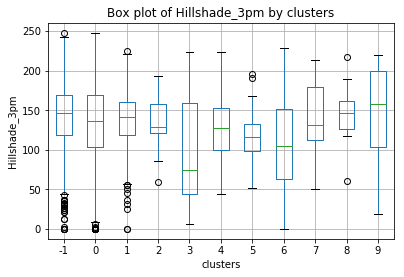

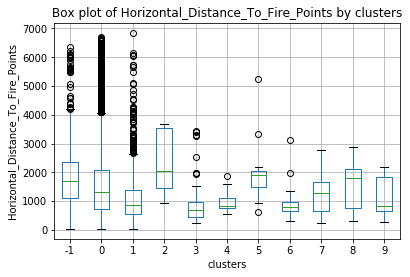

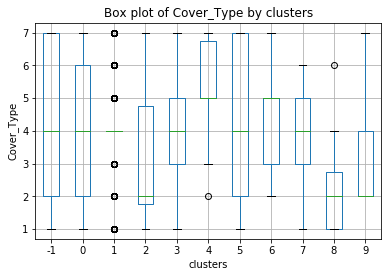

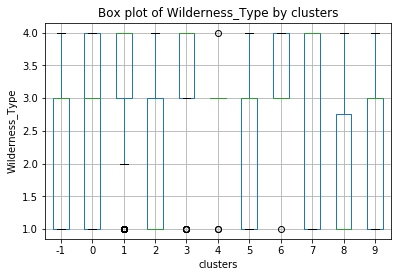

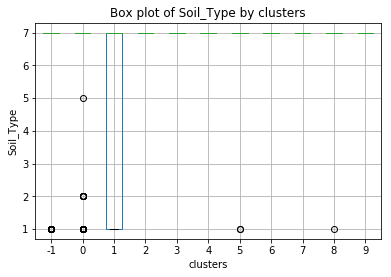

In [220]:
#######################################
# NOW RUN MODEL, VISUALISE AND VALIDATE
#######################################

### DBSCANS ARGUMENTS
epsilon = 0.1
minPts = 10

########################
##MODELLING SECTION
########################
dbs = cluster.DBSCAN(eps=epsilon,min_samples=minPts) # Run the model
dbs_fit = dbs.fit(model)
labels = dbs_fit.labels_
model['clusters'] = labels
model['c'] = "count"
model['target'] = model_prep['Cover_Type']

#########################
## VISUALISE AND VALIDATE
#########################
plot_clusters_graph(variable_1,variable_2) # calls function to visualise clusters
validate_test() # calls function to validate model 

## RELATIONSHIP 2

In [221]:
##############################################################################
# INITIALIZING MODEL PARAMETERS FOR TESTING
# VARIABLES EXPLORED: ‘Slope’ vs ‘Horizontal Distance to Hydrology’ 
##############################################################################

## CHANGE THESE TWO VALUES WHEN TESTING DIFFERENT RELATIONSHIPS
variable_1 = 2
variable_2 = 3

# ASSIGN THE VARIABLES BEING TESTED TO THE MODEL_DF OBJECT
model_df = model_prep.iloc[:,[variable_1,variable_2]] 

# STANDARDISERS THIS SUBSET THAT WE ARE ABOUT TO MODEL AND RETURNS TO DATAFRAME FORMAT 
# (FOR EASE OF CALLING LATER)
scaled_features = StandardScaler().fit_transform(model_df)
model = pd.DataFrame(scaled_features, index=model_df.index, columns=model_df.columns)

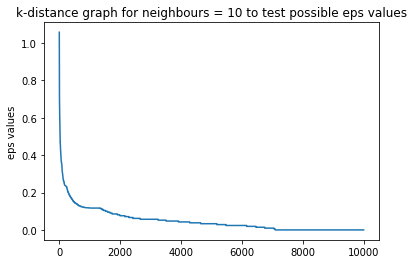

In [149]:
##############################################################################
# FIND THE BEST EPS TO USE FOR THIS RELATIONSHIP
##############################################################################

# SET UP THE NN TEST
nbrs = NearestNeighbors(n_neighbors=10).fit(model)
distances, indices = nbrs.kneighbors(model)
distances.shape

# CHOOSE THE 100th NEIGHBOUR DISTANCE
kDis = distances[:, 9]
kDis.sort()
kDis = kDis[range(len(kDis)-1, 0, -1)]

# PLOT THE K-DISTANCE GRAPH
plt.plot(range(0,len(kDis)), kDis)
plt.title("k-distance graph for neighbours = 10 to test possible eps values")
plt.ylabel("eps values")
plt.show()

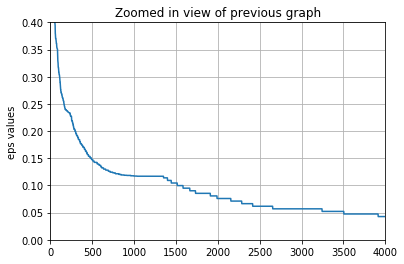

In [158]:
####################################
# ZOOM IN TO SEE CURVE
####################################
plt.plot(range(0,len(kDis)), kDis)
plt.xlim(0,4000)
plt.ylim(0.0,0.40)
plt.title("Zoomed in view of previous graph")
plt.ylabel("eps values")
plt.grid()
plt.show()

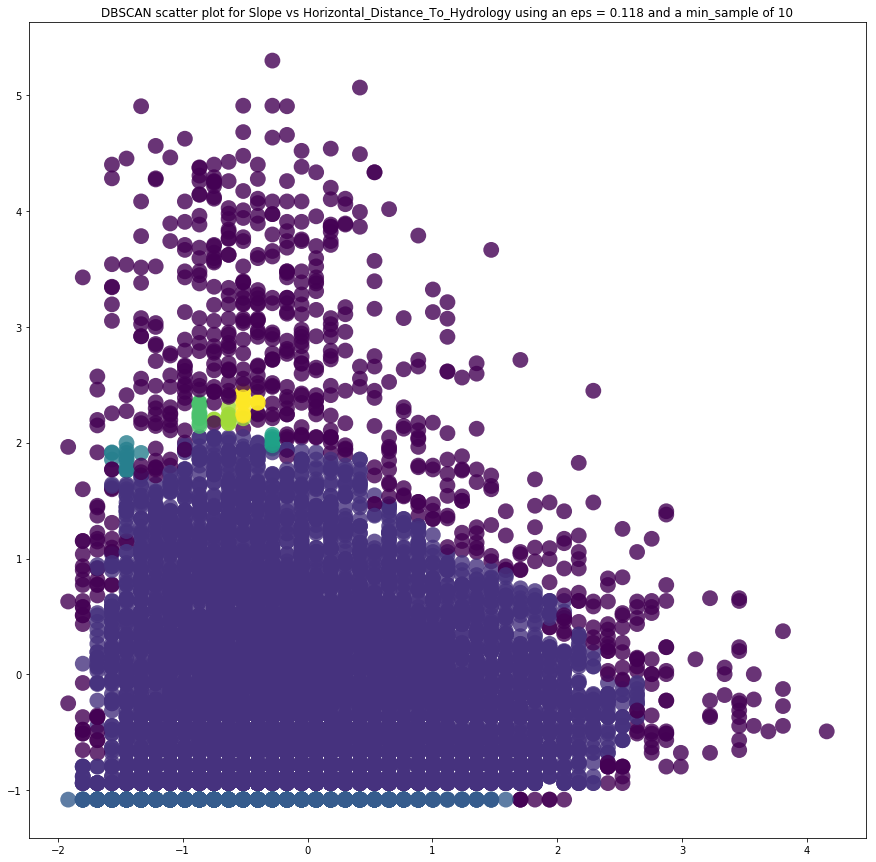

This is the clustering result

                      c
clusters target        
-1       1        111.0
         2        116.0
         3         73.0
         4         49.0
         5         77.0
         6         19.0
         7        246.0
 0       1       1171.0
         2       1289.0
         3       1152.0
         4        914.0
         5       1382.0
         6       1253.0
         7       1034.0
 1       1         75.0
         2         40.0
         3         35.0
         4        657.0
         5        121.0
         6         76.0
         7         58.0
 2       1          3.0
         2          3.0
         3          2.0
         4          NaN
         5          1.0
         6          1.0
         7          4.0
 3       1          NaN
         2          4.0
         3          NaN
         4          NaN
         5          1.0
         6          NaN
         7          2.0
 4       1          4.0
         2          4.0
         3          NaN
         

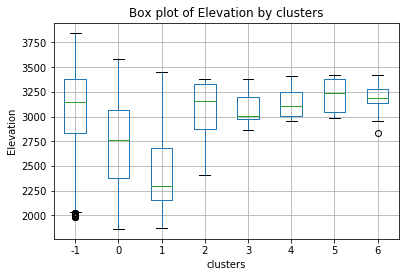

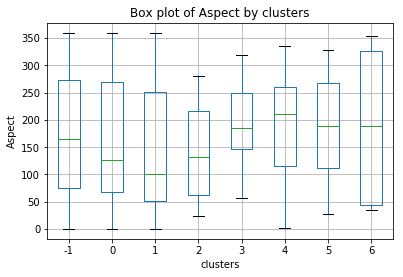

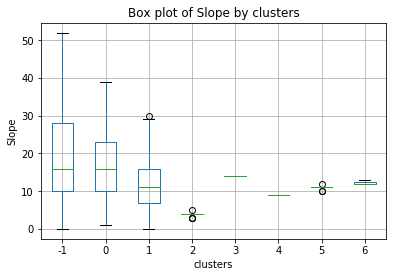

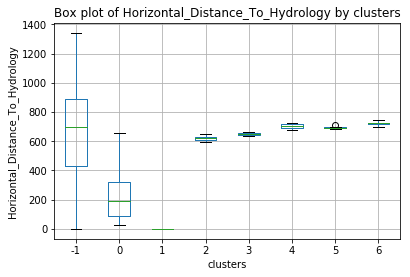

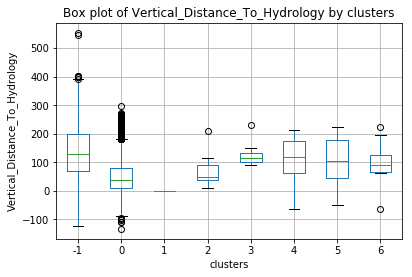

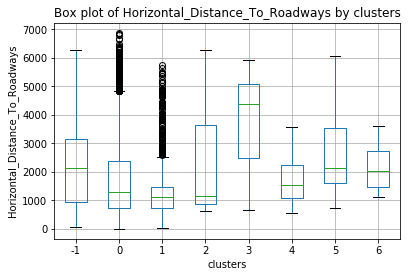

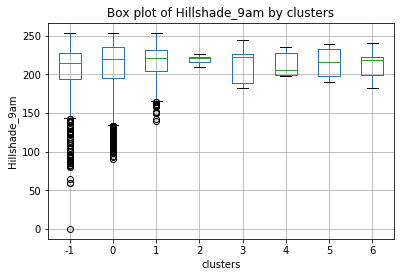

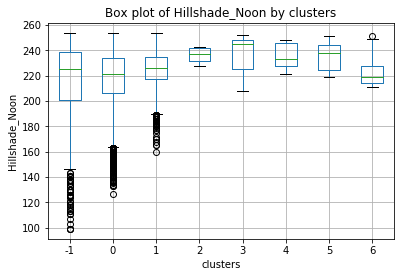

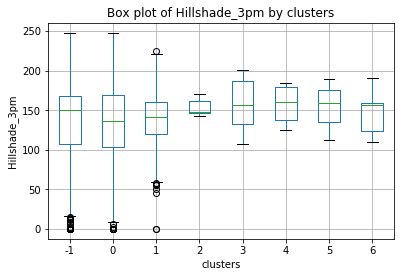

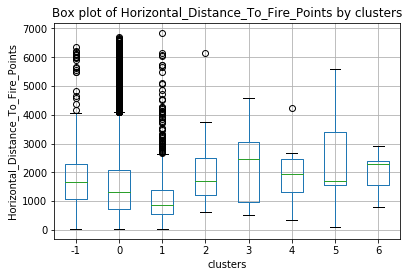

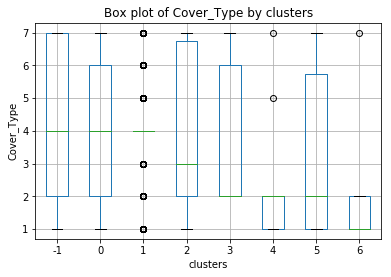

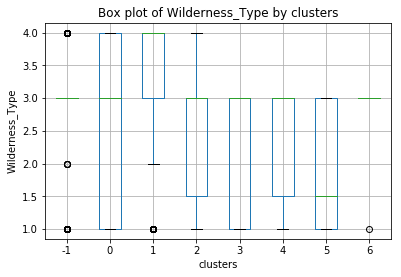

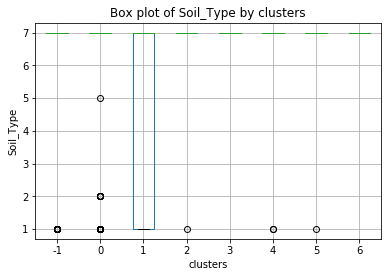

In [222]:
#######################################
# NOW RUN MODEL, VISUALISE AND VALIDATE
#######################################

### DBSCANS ARGUMENTS
epsilon = 0.118
minPts = 10

########################
##MODELLING SECTION
########################
dbs = cluster.DBSCAN(eps=epsilon,min_samples=minPts) # Run the model
dbs_fit = dbs.fit(model)
labels = dbs_fit.labels_
model['clusters'] = labels
model['c'] = "count"
model['target'] = dataset_subset['Cover_Type']

#########################
## VISUALISE AND VALIDATE
#########################
plot_clusters_graph(variable_1,variable_2) # calls function to visualise clusters
validate_test() # calls function to validate model 

## RELATIONSHIP 3

In [223]:
##############################################################################
# INITIALIZING MODEL PARAMETERS FOR TESTING
# VARIABLES EXPLORED: ‘Slope’ vs ‘Vertical Distance to Hydrology’
##############################################################################

## CHANGE THESE TWO VALUES WHEN TESTING DIFFERENT RELATIONSHIPS
variable_1 = 2
variable_2 = 4

# ASSIGN THE VARIABLES BEING TESTED TO THE MODEL_DF OBJECT
model_df = model_prep.iloc[:,[variable_1,variable_2]] 

# STANDARDISERS THIS SUBSET THAT WE ARE ABOUT TO MODEL AND RETURNS TO DATAFRAME FORMAT 
# (FOR EASE OF CALLING LATER)
scaled_features = StandardScaler().fit_transform(model_df)
model = pd.DataFrame(scaled_features, index=model_df.index, columns=model_df.columns)

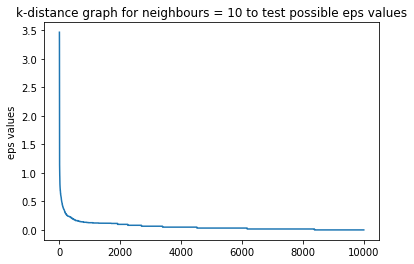

In [174]:
##############################################################################
# FIND THE BEST EPS TO USE FOR THIS RELATIONSHIP
##############################################################################

# SET UP THE NN TEST
nbrs = NearestNeighbors(n_neighbors=10).fit(model)
distances, indices = nbrs.kneighbors(model)
distances.shape

# CHOOSE THE 100th NEIGHBOUR DISTANCE
kDis = distances[:, 9]
kDis.sort()
kDis = kDis[range(len(kDis)-1, 0, -1)]

# PLOT THE K-DISTANCE GRAPH
plt.plot(range(0,len(kDis)), kDis)
plt.title("k-distance graph for neighbours = 10 to test possible eps values")
plt.ylabel("eps values")
plt.show()

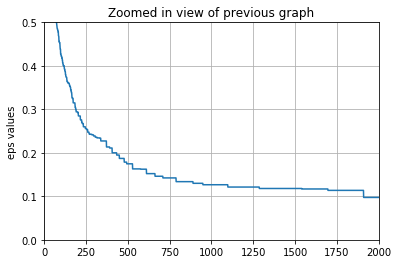

In [175]:
####################################
# ZOOM IN TO SEE CURVE
####################################
plt.plot(range(0,len(kDis)), kDis)
plt.xlim(0,2000)
plt.ylim(0,0.5)
plt.title("Zoomed in view of previous graph")
plt.ylabel("eps values")
plt.grid()
plt.show()

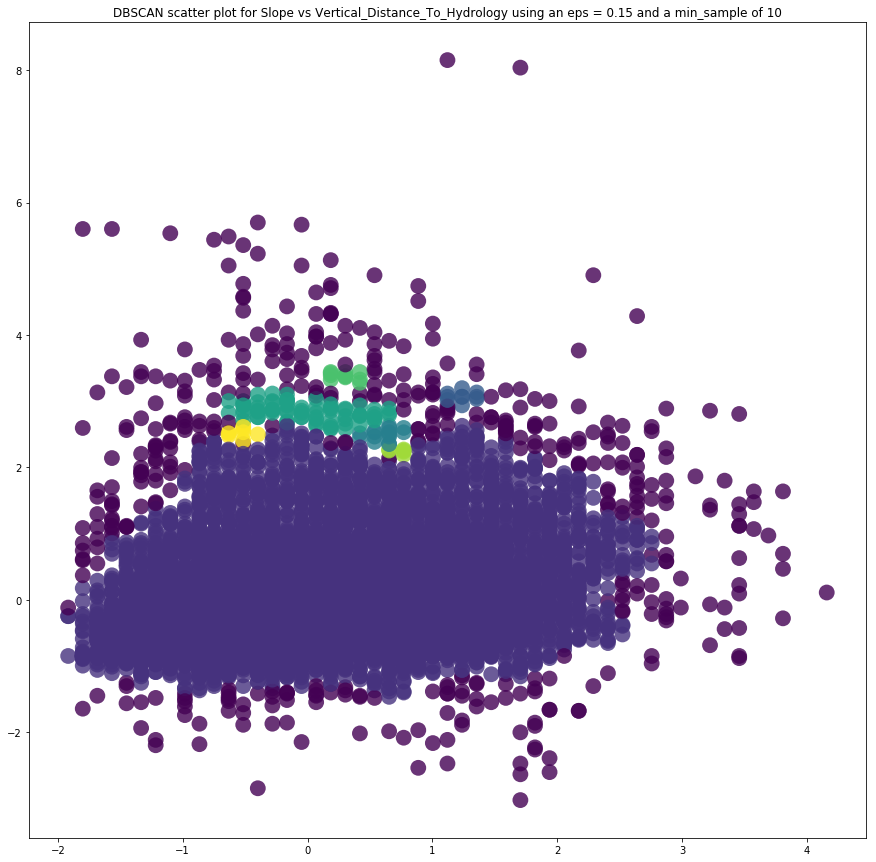

This is the clustering result

                      c
clusters target        
-1       1         54.0
         2         57.0
         3         71.0
         4         46.0
         5         73.0
         6         29.0
         7        109.0
 0       1       1309.0
         2       1392.0
         3       1172.0
         4       1562.0
         5       1492.0
         6       1315.0
         7       1195.0
 1       1          1.0
         2          1.0
         3          NaN
         4          3.0
         5          1.0
         6          2.0
         7          2.0
 2       1          2.0
         2          NaN
         3          4.0
         4          4.0
         5          4.0
         6          NaN
         7          1.0
 3       1          5.0
         2          8.0
         3         11.0
         4          2.0
         5         11.0
         6          NaN
         7         35.0
 4       1          3.0
         2          3.0
         3          2.0
         

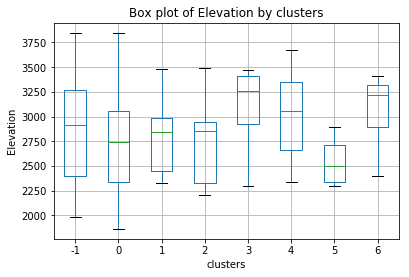

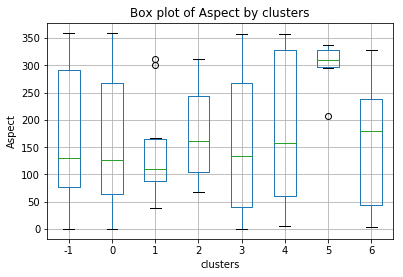

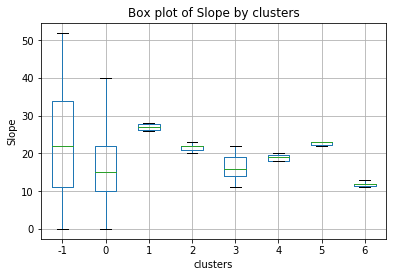

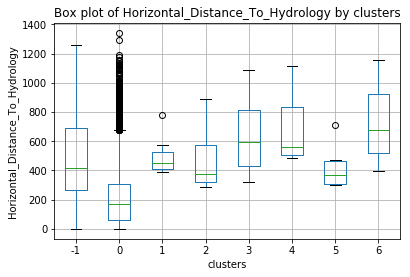

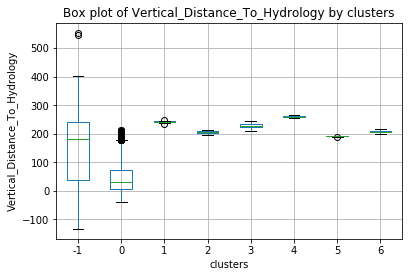

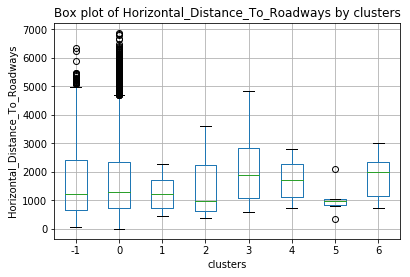

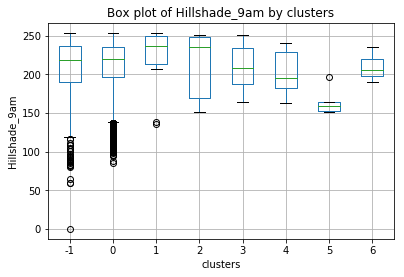

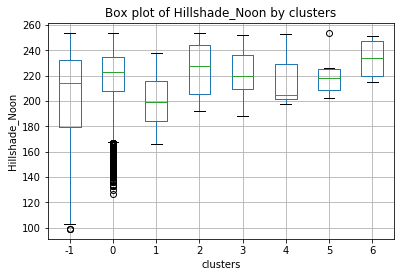

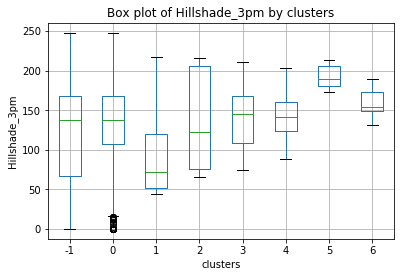

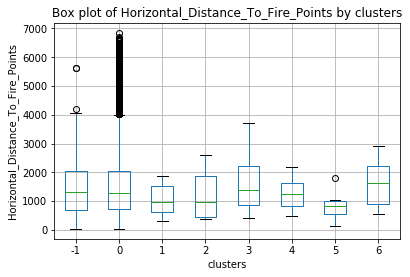

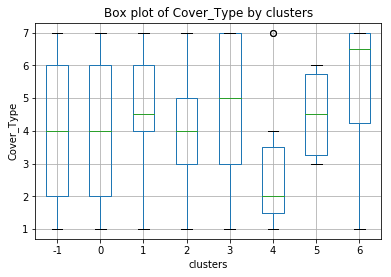

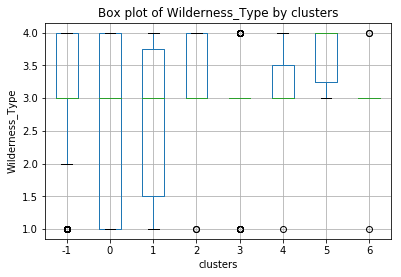

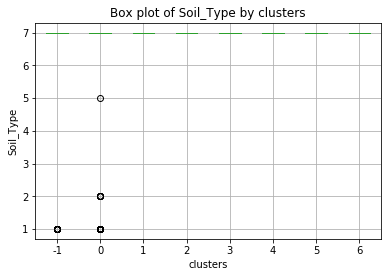

In [224]:
#######################################
# NOW RUN MODEL, VISUALISE AND VALIDATE
#######################################

### DBSCANS ARGUMENTS
epsilon = 0.15 
minPts = 10

########################
##MODELLING SECTION
########################
dbs = cluster.DBSCAN(eps=epsilon,min_samples=minPts) # Run the model
dbs_fit = dbs.fit(model)
labels = dbs_fit.labels_
model['clusters'] = labels
model['c'] = "count"
model['target'] = model_prep['Cover_Type']

#########################
## VISUALISE AND VALIDATE
#########################
plot_clusters_graph(variable_1,variable_2) # calls function to visualise clusters
validate_test() # calls function to validate model 

## RELATIONSHIP 4

In [225]:
##############################################################################
# INITIALIZING MODEL PARAMETERS FOR TESTING
# VARIABLES EXPLORED:  ‘Vertical Distance to Hydrology’ vs ‘Elevation’
##############################################################################

## CHANGE THESE TWO VALUES WHEN TESTING DIFFERENT RELATIONSHIPS
variable_1 = 4
variable_2 = 0

# ASSIGN THE VARIABLES BEING TESTED TO THE MODEL_DF OBJECT
model_df = model_prep.iloc[:,[variable_1,variable_2]] 

# STANDARDISERS THIS SUBSET THAT WE ARE ABOUT TO MODEL AND RETURNS TO DATAFRAME FORMAT 
# (FOR EASE OF CALLING LATER)
scaled_features = StandardScaler().fit_transform(model_df)
model = pd.DataFrame(scaled_features, index=model_df.index, columns=model_df.columns)

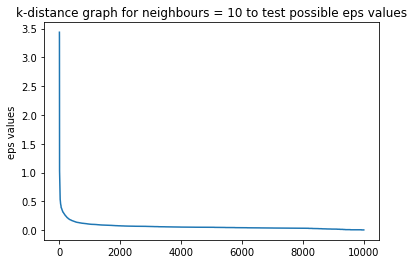

In [187]:
##############################################################################
# FIND THE BEST EPS TO USE FOR THIS RELATIONSHIP
##############################################################################

# SET UP THE NN TEST
nbrs = NearestNeighbors(n_neighbors=10).fit(model)
distances, indices = nbrs.kneighbors(model)
distances.shape

# CHOOSE THE 100th NEIGHBOUR DISTANCE
kDis = distances[:, 9]
kDis.sort()
kDis = kDis[range(len(kDis)-1, 0, -1)]

# PLOT THE K-DISTANCE GRAPH
plt.plot(range(0,len(kDis)), kDis)
plt.title("k-distance graph for neighbours = 10 to test possible eps values")
plt.ylabel("eps values")
plt.show()

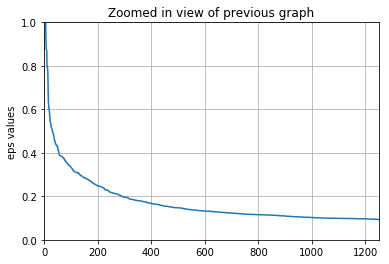

In [189]:
####################################
# ZOOM IN TO SEE CURVE
####################################
plt.plot(range(0,len(kDis)), kDis)
plt.xlim(0,1250)
plt.ylim(0,1)
plt.title("Zoomed in view of previous graph")
plt.ylabel("eps values")
plt.grid()
plt.show()

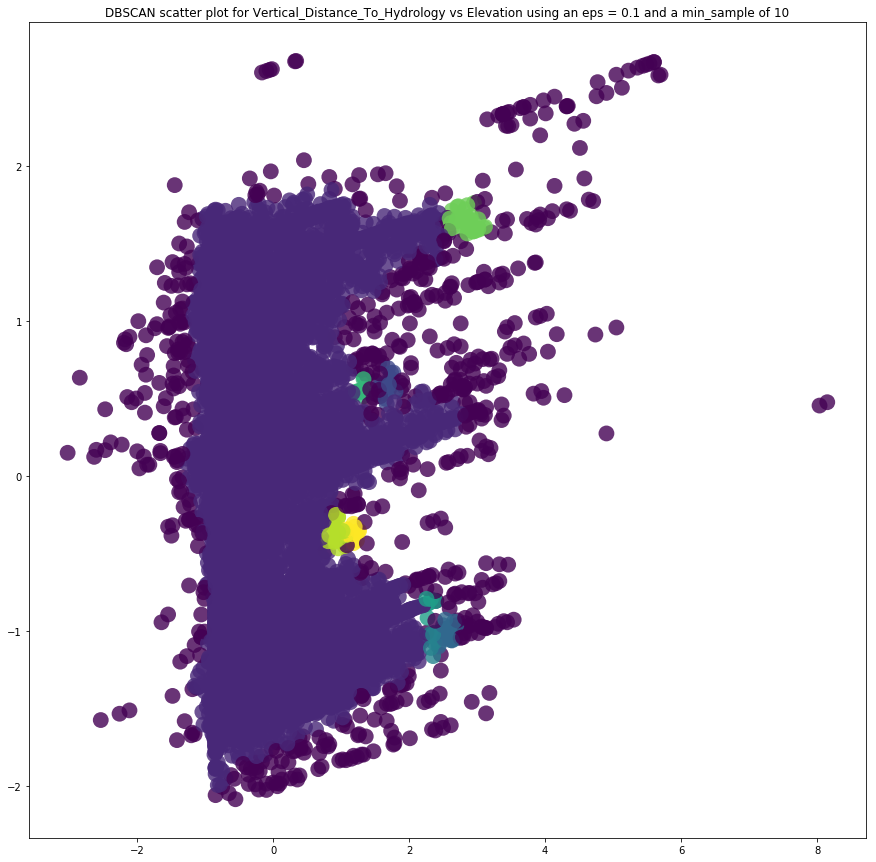

This is the clustering result

                      c
clusters target        
-1       1        117.0
         2        111.0
         3        134.0
         4         16.0
         5         68.0
         6         86.0
         7        128.0
 0       1       1254.0
         2       1332.0
         3       1105.0
         4       1581.0
         5       1511.0
         6       1247.0
         7       1187.0
 1       1          2.0
         2         12.0
         3          NaN
         4          NaN
         5          1.0
         6          NaN
         7          NaN
 2       1          NaN
         2          NaN
         3          6.0
         4         14.0
         5          NaN
         6          NaN
         7          NaN
 3       1          NaN
         2          NaN
         3          3.0
         4          4.0
         5          NaN
         6          NaN
         7          NaN
 4       1          NaN
         2          NaN
         3          2.0
         

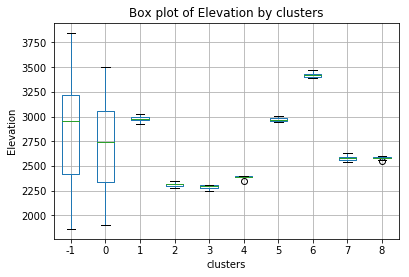

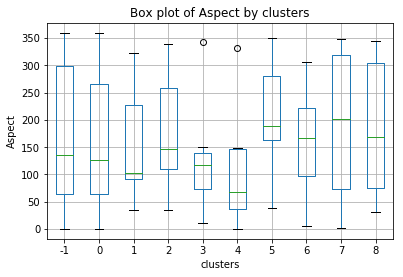

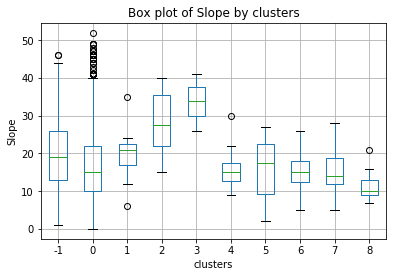

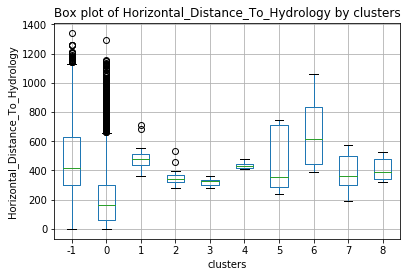

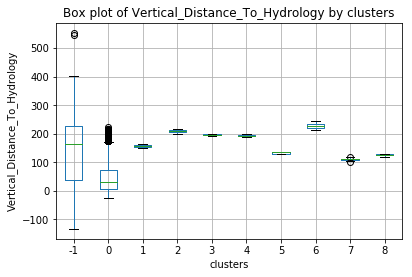

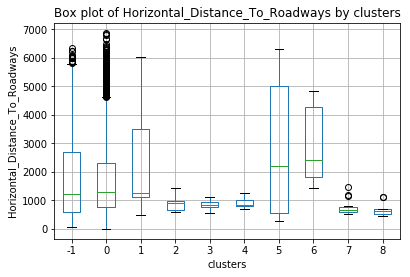

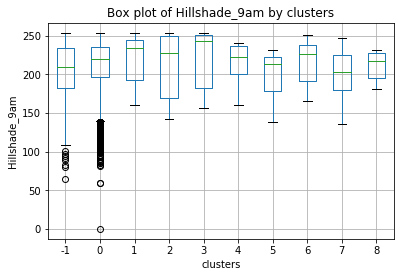

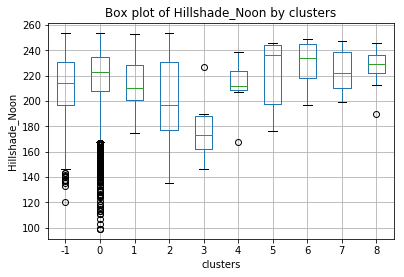

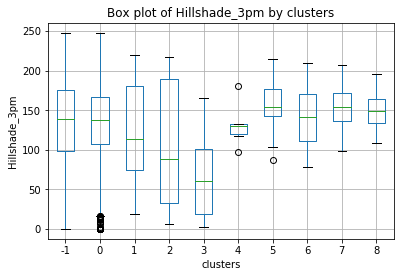

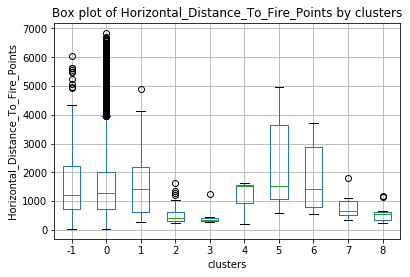

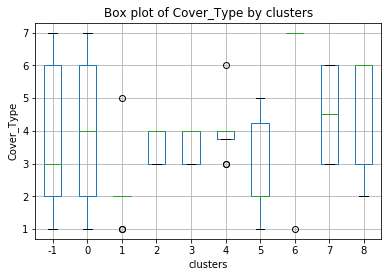

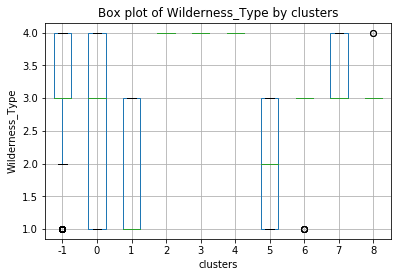

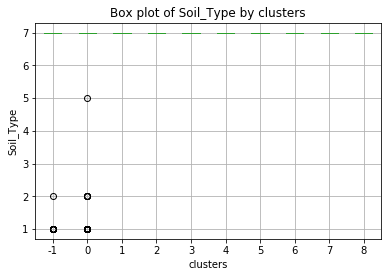

In [226]:
#######################################
# NOW RUN MODEL, VISUALISE AND VALIDATE
#######################################

### DBSCANS ARGUMENTS
epsilon = 0.1 
minPts = 10

########################
##MODELLING SECTION
########################
dbs = cluster.DBSCAN(eps=epsilon,min_samples=minPts) # Run the model
dbs_fit = dbs.fit(model)
labels = dbs_fit.labels_
model['clusters'] = labels
model['c'] = "count"
model['target'] = model_prep['Cover_Type']

#########################
## VISUALISE AND VALIDATE
#########################
plot_clusters_graph(variable_1,variable_2) # calls function to visualise clusters
validate_test() # calls function to validate model 

## RELATIONSHIP 5

In [227]:
##############################################################################
# INITIALIZING MODEL PARAMETERS FOR TESTING
# VARIABLES EXPLORED: ‘Soil Type’ vs Vertical Distance to Hydrology’
##############################################################################

## CHANGE THESE TWO VALUES WHEN TESTING DIFFERENT RELATIONSHIPS
variable_1 = 3
variable_2 = 5

# ASSIGN THE VARIABLES BEING TESTED TO THE MODEL_DF OBJECT
model_df = model_prep.iloc[:,[variable_1,variable_2]] 

# STANDARDISERS THIS SUBSET THAT WE ARE ABOUT TO MODEL AND RETURNS TO DATAFRAME FORMAT 
# (FOR EASE OF CALLING LATER)
scaled_features = StandardScaler().fit_transform(model_df)
model = pd.DataFrame(scaled_features, index=model_df.index, columns=model_df.columns)

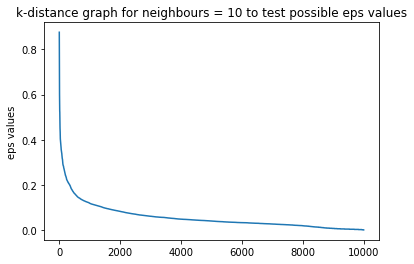

In [192]:
##############################################################################
# FIND THE BEST EPS TO USE FOR THIS RELATIONSHIP
##############################################################################

# SET UP THE NN TEST
nbrs = NearestNeighbors(n_neighbors=10).fit(model)
distances, indices = nbrs.kneighbors(model)
distances.shape

# CHOOSE THE 100th NEIGHBOUR DISTANCE
kDis = distances[:, 9]
kDis.sort()
kDis = kDis[range(len(kDis)-1, 0, -1)]

# PLOT THE K-DISTANCE GRAPH
plt.plot(range(0,len(kDis)), kDis)
plt.title("k-distance graph for neighbours = 10 to test possible eps values")
plt.ylabel("eps values")
plt.show()

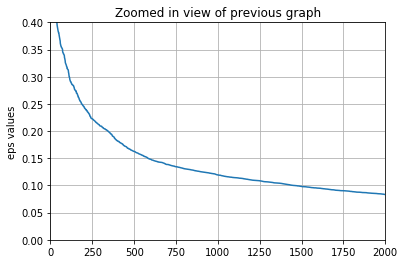

In [193]:
####################################
# ZOOM IN TO SEE CURVE
####################################
plt.plot(range(0,len(kDis)), kDis)
plt.xlim(0,2000)
plt.ylim(0,0.4)
plt.title("Zoomed in view of previous graph")
plt.ylabel("eps values")
plt.grid()
plt.show()

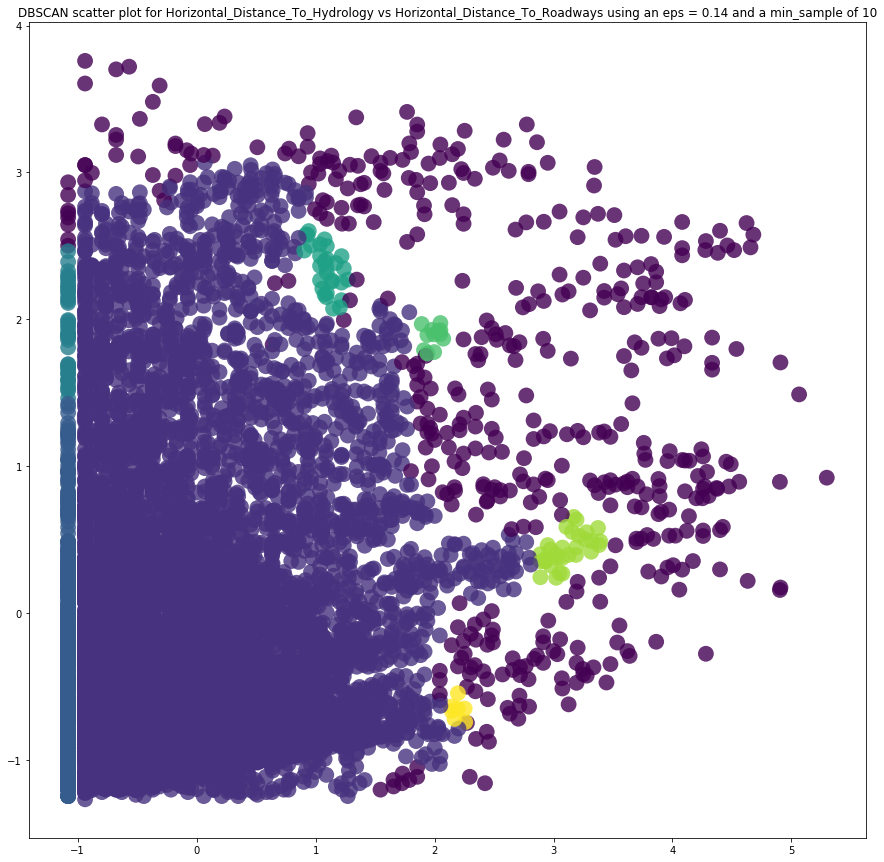

This is the clustering result

                      c
clusters target        
-1       1        107.0
         2        143.0
         3          NaN
         4          NaN
         5         17.0
         6          NaN
         7        187.0
 0       1       1165.0
         2       1272.0
         3       1227.0
         4        958.0
         5       1430.0
         6       1273.0
         7       1081.0
 1       1         62.0
         2         25.0
         3         35.0
         4        662.0
         5        117.0
         6         76.0
         7         42.0
 2       1         12.0
         2         10.0
         3          NaN
         4          NaN
         5          5.0
         6          NaN
         7         15.0
 3       1         16.0
         2          6.0
         3          NaN
         4          NaN
         5          NaN
         6          NaN
         7          7.0
 4       1          3.0
         2          1.0
         3          NaN
         

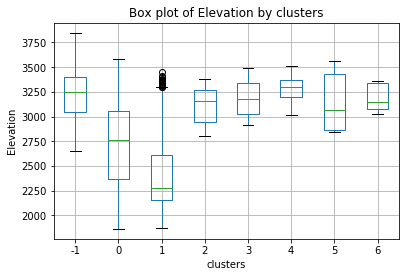

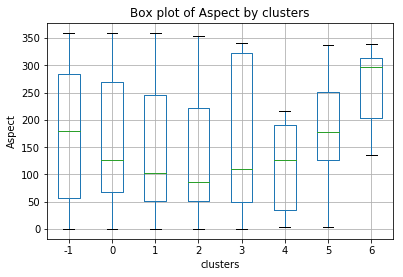

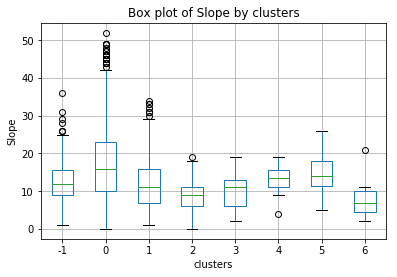

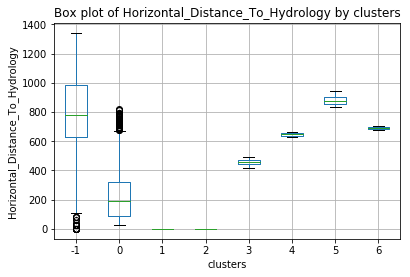

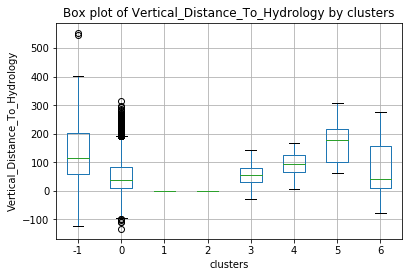

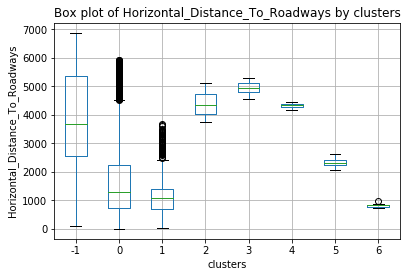

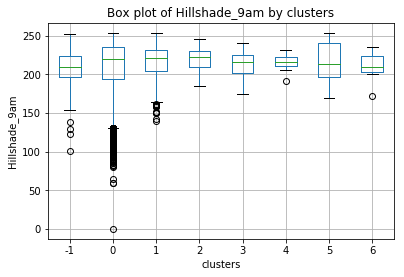

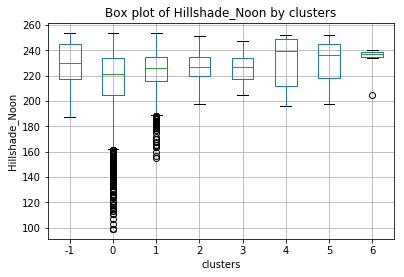

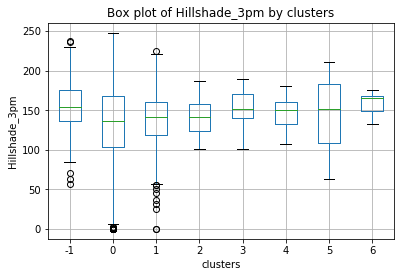

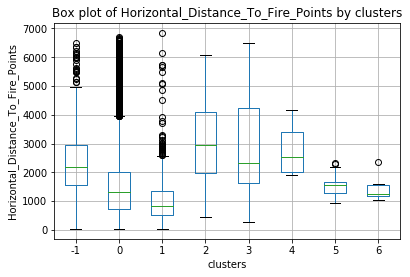

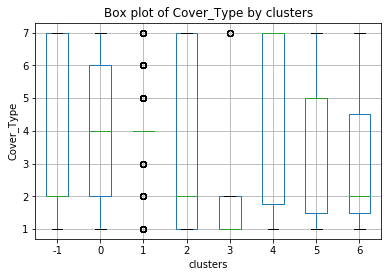

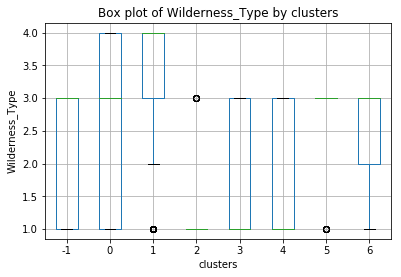

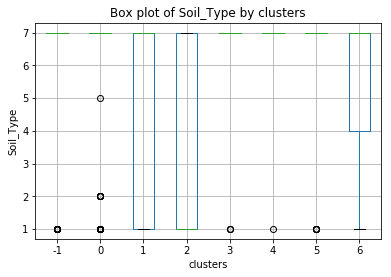

In [228]:
#######################################
# NOW RUN MODEL, VISUALISE AND VALIDATE
#######################################

### DBSCANS ARGUMENTS
epsilon = 0.14 
minPts = 10

########################
##MODELLING SECTION
########################
dbs = cluster.DBSCAN(eps=epsilon,min_samples=minPts) # Run the model
dbs_fit = dbs.fit(model)
labels = dbs_fit.labels_
model['clusters'] = labels
model['c'] = "count"
model['target'] = dataset_subset['Cover_Type']

#########################
## VISUALISE AND VALIDATE
#########################
plot_clusters_graph(variable_1,variable_2) # calls function to visualise clusters
validate_test() # calls function to validate model 

## RELATIONSHIP 6

In [229]:
##############################################################################
# INITIALIZING MODEL PARAMETERS FOR TESTING
# VARIABLES EXPLORED: ‘Cover Type’ vs ‘Vertical Distance to Hydrology’ 
##############################################################################

## CHANGE THESE TWO VALUES WHEN TESTING DIFFERENT RELATIONSHIPS
variable_1 = 10
variable_2 = 3

# ASSIGN THE VARIABLES BEING TESTED TO THE MODEL_DF OBJECT
model_df = model_prep.iloc[:,[variable_1,variable_2]] 

# STANDARDISERS THIS SUBSET THAT WE ARE ABOUT TO MODEL AND RETURNS TO DATAFRAME FORMAT 
# (FOR EASE OF CALLING LATER)
scaled_features = StandardScaler().fit_transform(model_df)
model = pd.DataFrame(scaled_features, index=model_df.index, columns=model_df.columns)

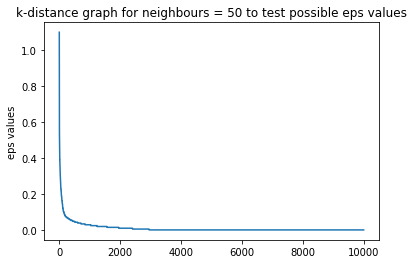

In [83]:
##############################################################################
# FIND THE BEST EPS TO USE FOR THIS RELATIONSHIP
##############################################################################

# SET UP THE NN TEST
nbrs = NearestNeighbors(n_neighbors=10).fit(model)
distances, indices = nbrs.kneighbors(model)
distances.shape

# CHOOSE THE 100th NEIGHBOUR DISTANCE
kDis = distances[:, 9]
kDis.sort()
kDis = kDis[range(len(kDis)-1, 0, -1)]

# PLOT THE K-DISTANCE GRAPH
plt.plot(range(0,len(kDis)), kDis)
plt.title("k-distance graph for neighbours = 50 to test possible eps values")
plt.ylabel("eps values")
plt.show()

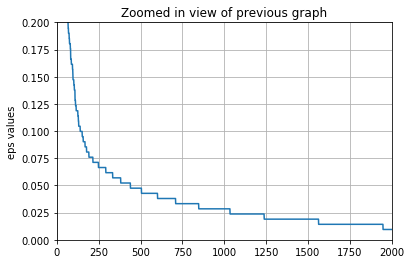

In [84]:
####################################
# ZOOM IN TO SEE CURVE
####################################
plt.plot(range(0,len(kDis)), kDis)
plt.xlim(0,2000)
plt.ylim(0,0.2)
plt.title("Zoomed in view of previous graph")
plt.ylabel("eps values")
plt.grid()
plt.show()

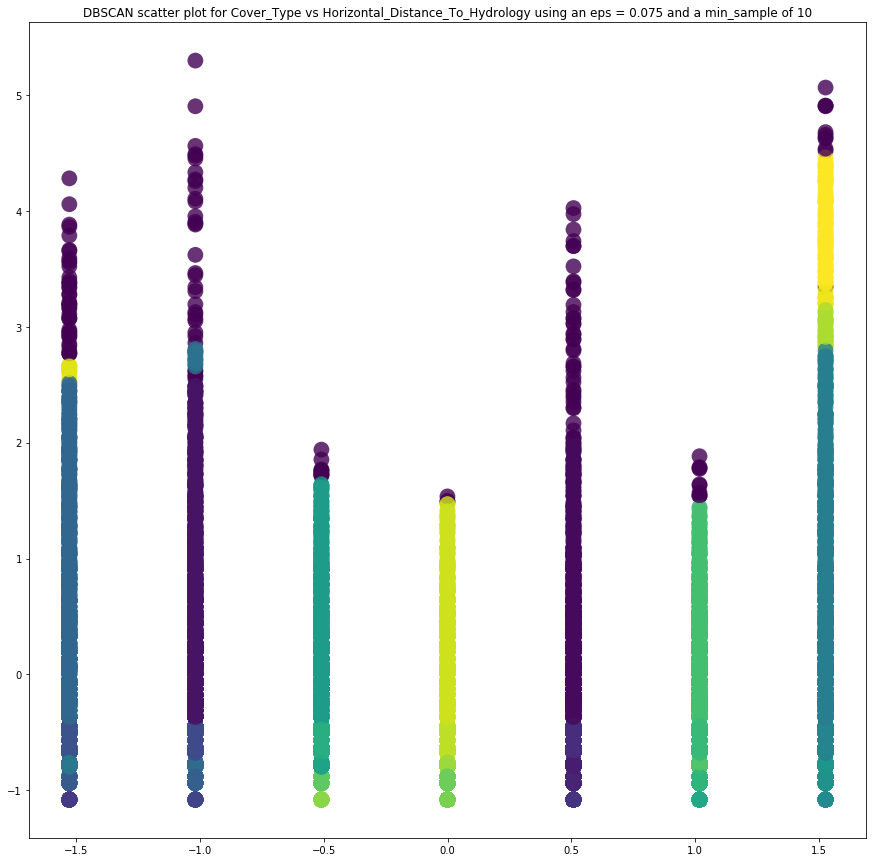

This is the clustering result

                      c
clusters target        
-1       1         41.0
         2         33.0
         3         10.0
         4          3.0
         5         38.0
         6         10.0
         7         11.0
 0       1          NaN
         2          NaN
         3          NaN
         4          NaN
         5        867.0
         6          NaN
         7          NaN
 1       1          NaN
         2       1009.0
         3          NaN
         4          NaN
         5          NaN
         6          NaN
         7          NaN
 2       1          NaN
         2          NaN
         3          NaN
         4          NaN
         5        112.0
         6          NaN
         7          NaN
 3       1          NaN
         2          NaN
         3          NaN
         4          NaN
         5        167.0
         6          NaN
         7          NaN
 4       1          NaN
         2          NaN
         3          NaN
         

In [ ]:
#######################################
# NOW RUN MODEL, VISUALISE AND VALIDATE
#######################################

### DBSCANS ARGUMENTS
epsilon = 0.075 
minPts = 10

########################
##MODELLING SECTION
########################
dbs = cluster.DBSCAN(eps=epsilon,min_samples=minPts) # Run the model
dbs_fit = dbs.fit(model)
labels = dbs_fit.labels_
model['clusters'] = labels
model['c'] = "count"
model['target'] = model_prep['Cover_Type']

#########################
## VISUALISE AND VALIDATE
#########################
plot_clusters_graph(variable_1,variable_2) # calls function to visualise clusters
validate_test() # calls function to validate model 

## RELATIONSHIP 7

In [38]:
##############################################################################
# INITIALIZING MODEL PARAMETERS FOR TESTING
# VARIABLES EXPLORED: ‘Cover Type’ vs ‘Horizontal Distance to Hydrology’ 
##############################################################################

## CHANGE THESE TWO VALUES WHEN TESTING DIFFERENT RELATIONSHIPS
variable_1 = 10
variable_2 = 4

# ASSIGN THE VARIABLES BEING TESTED TO THE MODEL_DF OBJECT
model_df = model_prep.iloc[:,[variable_1,variable_2]] 

# STANDARDISERS THIS SUBSET THAT WE ARE ABOUT TO MODEL AND RETURNS TO DATAFRAME FORMAT 
# (FOR EASE OF CALLING LATER)
scaled_features = StandardScaler().fit_transform(model_df)
model = pd.DataFrame(scaled_features, index=model_df.index, columns=model_df.columns)

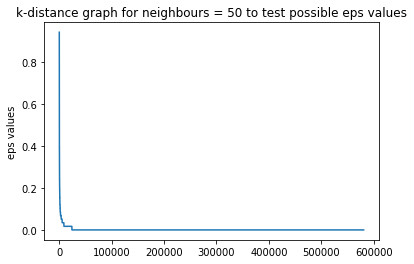

In [39]:
##############################################################################
# FIND THE BEST EPS TO USE FOR THIS RELATIONSHIP
##############################################################################

# SET UP THE NN TEST
nbrs = NearestNeighbors(n_neighbors=50).fit(model)
distances, indices = nbrs.kneighbors(model)
distances.shape

# CHOOSE THE 100th NEIGHBOUR DISTANCE
kDis = distances[:, 49]
kDis.sort()
kDis = kDis[range(len(kDis)-1, 0, -1)]

# PLOT THE K-DISTANCE GRAPH
plt.plot(range(0,len(kDis)), kDis)
plt.title("k-distance graph for neighbours = 50 to test possible eps values")
plt.ylabel("eps values")
plt.show()

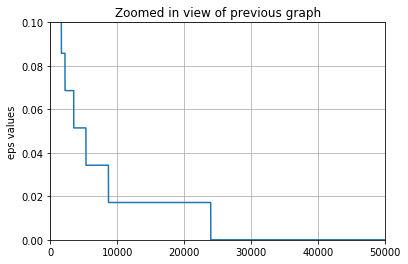

In [41]:
####################################
# ZOOM IN TO SEE CURVE
####################################
plt.plot(range(0,len(kDis)), kDis)
plt.xlim(0,50000)
plt.ylim(0,0.1)
plt.title("Zoomed in view of previous graph")
plt.ylabel("eps values")
plt.grid()
plt.show()

In [ ]:
#######################################
# NOW RUN MODEL, VISUALISE AND VALIDATE
#######################################

### DBSCANS ARGUMENTS
epsilon = 0.05 
minPts = 50

########################
##MODELLING SECTION
########################
dbs = cluster.DBSCAN(eps=epsilon,min_samples=minPts) # Run the model
dbs_fit = dbs.fit(model)
labels = dbs_fit.labels_
model['clusters'] = labels
model['c'] = "count"
model['target'] = model_prep['Cover_Type']

#########################
## VISUALISE AND VALIDATE
#########################
plot_clusters_graph(variable_1,variable_2) # calls function to visualise clusters
validate_test() # calls function to validate model 

## RELATIONSHIP 8

In [86]:
##############################################################################
# INITIALIZING MODEL PARAMETERS FOR TESTING
# VARIABLES EXPLORED: xxxxxx
##############################################################################

## CHANGE THESE TWO VALUES WHEN TESTING DIFFERENT RELATIONSHIPS
variable_1 = 10
variable_2 = 5

# ASSIGN THE VARIABLES BEING TESTED TO THE MODEL_DF OBJECT
model_df = model_prep.iloc[:,[variable_1,variable_2]] 

# STANDARDISERS THIS SUBSET THAT WE ARE ABOUT TO MODEL AND RETURNS TO DATAFRAME FORMAT 
# (FOR EASE OF CALLING LATER)
scaled_features = StandardScaler().fit_transform(model_df)
model = pd.DataFrame(scaled_features, index=model_df.index, columns=model_df.columns)

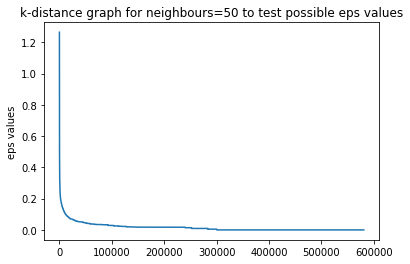

In [88]:
##############################################################################
# FIND THE BEST EPS TO USE FOR THIS RELATIONSHIP
##############################################################################

# SET UP THE NN TEST
nbrs = NearestNeighbors(n_neighbors=50).fit(model)
distances, indices = nbrs.kneighbors(model)
distances.shape

# CHOOSE THE 100th NEIGHBOUR DISTANCE
kDis = distances[:, 49]
kDis.sort()
kDis = kDis[range(len(kDis)-1, 0, -1)]

# PLOT THE K-DISTANCE GRAPH
plt.plot(range(0,len(kDis)), kDis)
plt.title("k-distance graph for neighbours = 50 to test possible eps values")
plt.ylabel("eps values")
plt.show()

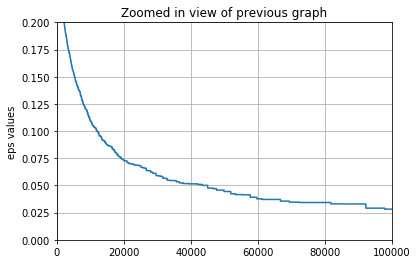

In [89]:
####################################
# ZOOM IN TO SEE CURVE
####################################
plt.plot(range(0,len(kDis)), kDis)
plt.xlim(0,100000)
plt.ylim(0,0.2)
plt.title("Zoomed in view of previous graph")
plt.ylabel("eps values")
plt.grid()
plt.show()

In [ ]:
#######################################
# NOW RUN MODEL, VISUALISE AND VALIDATE
#######################################

### DBSCANS ARGUMENTS
epsilon = 0.075 
minPts = 50

########################
##MODELLING SECTION
########################
dbs = cluster.DBSCAN(eps=epsilon,min_samples=minPts) # Run the model
dbs_fit = dbs.fit(model)
labels = dbs_fit.labels_
model['clusters'] = labels
model['c'] = "count"
model['target'] = model_prep['Cover_Type']

#########################
## VISUALISE AND VALIDATE
#########################
plot_clusters_graph(variable_1,variable_2) # calls function to visualise clusters
validate_test() # calls function to validate model 